# <center>**Board Game Recommender**</center>

<img src='Board_Game.png'>

## **Table of Contents (Work in progress)**

1. [Problem Statement](#problem)
2. [Data Loading and Review](#data-loading)
3. [Exploratory Data Analysis (EDA)](#eda)
4. [Data Preprocessing](#data-preprocess)
[<ul>4.1 Custom Transformer</ul>](#custom)
[<ul>4.2 Numerical Pipelines</ul>](#numeric)
[<ul>4.3 Ordinal Pipeline</ul>](#ordinal)
[<ul>4.4 Column Transformers</ul>](#column)
5. [Model Selection and Training](#selection)
[<ul>5.1 Shortlist Promising Models</ul>](#initial)
[<ul>5.2 Fine Tuning</ul>](#fine)
6. [Model Evaluation](#evaluation)
7. [Conclusion](#conclude)
8. [Appendix](#append)

---

## **1. Problem Statement** <a class="anchor" id="problem"></a>

The goal of this project is to create a model to recommend board games using the [Board Games Dataset](https://www.kaggle.com/datasets/andrewmvd/board-games) from Kaggle.  This project was created as the capstone project in my Master of Data Science program at Eastern University.  

The dataset author's description of the columns is in the Appendix section.  

## **2. Data Loading and Exploration** <a class="anchor" id="data-loading"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%html
<style>
table {
  float: left;
}
</style>

In [3]:
board_game_data = pd.read_csv("bgg_dataset.csv")

In [4]:
board_game_data.head()

ID                               Name  Year Published  Min Players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   Max Players  Play Time  Min Age  Users Rated  Rating Average  BGG Rank  \
0            4        120       14        42055            8.79         1   
1            4         60       13        41643            8.61         2   
2            4        120       14        19217            8.66         3   
3            5        120       12        64864            8.43         4   
4            6        480       14        13468            8.70         5   

   Complexity Average  Owned Users  \
0                3.86      68323.0   
1                2.84      65294.0   
2                3.91      28785.0   
3                3.24      87099.0   
4                4.22      16831.0   

                                           Mechanics  \
0  Action Queue, Action Retrieval, Campaign / Bat...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Hand Management, Income, Loans, Market, Networ...   
3  Card Drafting, Drafting, End Game Bonuses, Han...   
4  Action Drafting, Area Majority / Influence, Ar...   

                          Domains  
0  Strategy Games, Thematic Games  
1  Strategy Games, Thematic Games  
2                  Strategy Games  
3                  Strategy Games  
4  Strategy Games, Thematic Games

In [5]:
board_game_data.duplicated().sum()

0

In [6]:
board_game_data.shape

(20343, 14)

In [7]:
board_game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [8]:
board_game_data.isna().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [9]:
board_game_data[board_game_data['ID'].isna()]

ID                                               Name  Year Published  \
10776 NaN                            Ace of Aces: Jet Eagles          1990.0   
10835 NaN                                 Die Erben von Hoax          1999.0   
11152 NaN  Rommel in North Africa: The War in the Desert ...          1986.0   
11669 NaN                  Migration: A Story of Generations          2012.0   
12649 NaN                   Die Insel der steinernen Wachter          2009.0   
12764 NaN                   Dragon Ball Z TCG (2014 edition)          2014.0   
13282 NaN                                           Dwarfest          2014.0   
13984 NaN                                                Hus             NaN   
14053 NaN                                        Contrario 2          2006.0   
14663 NaN                           Warage: Extended Edition          2017.0   
16292 NaN                                            Rainbow          2010.0   
17009 NaN                Sexy, el juego del arte del flirteo          2014.0   
18672 NaN                    Dracarys Dice Don't Get Burned!          2018.0   
19332 NaN  Battleship: Tactical Capital Ship Combat 1925-...          1986.0   
19474 NaN                          The Umbrella Academy Game          2020.0   
20040 NaN                                    Hidden Conflict          2005.0   

       Min Players  Max Players  Play Time  Min Age  Users Rated  \
10776            2            2         20       10          110   
10835            3            8         45       12          137   
11152            2            2          0       12           53   
11669            2            4         30       12           49   
12649            2            4        120       12           49   
12764            2            2         20        8           33   
13282            2            6         45       12           82   
13984            2            2         40        0           38   
14053            2           12          0       14           37   
14663            2            6         90       10           49   
16292            2            6         20        8           35   
17009            3            4        120       18           39   
18672            2            5         15       10           86   
19332            2            2         90        8          131   
19474            1            6         40       12           41   
20040            2            6         30       10          128   

       Rating Average  BGG Rank  Complexity Average  Owned Users Mechanics  \
10776            6.26     10778                2.00          NaN       NaN   
10835            6.05     10837                2.00          NaN       NaN   
11152            6.76     11154                4.00          NaN       NaN   
11669            7.20     11671                2.00          NaN       NaN   
12649            6.73     12651                3.00          NaN       NaN   
12764            7.03     12766                2.50          NaN       NaN   
13282            6.13     13284                1.75          NaN       NaN   
13984            6.28     13986                2.00          NaN       NaN   
14053            6.30     14055                1.00          NaN       NaN   
14663            7.64     14665                3.00          NaN       NaN   
16292            5.65     16294                2.00          NaN       NaN   
17009            5.83     17011                2.00          NaN       NaN   
18672            5.33     18674                1.00          NaN       NaN   
19332            5.07     19334                2.00          NaN       NaN   
19474            3.16     19476                1.00          NaN       NaN   
20040            4.35     20042                2.00          NaN       NaN   

      Domains  
10776     NaN  
10835     NaN  
11152     NaN  
11669     NaN  
12649     NaN  
12764     NaN  
13282     NaN  
13984     NaN  
14053     NaN  
14

In [10]:
board_game_data[board_game_data['Year Published'].isna()]

ID Name  Year Published  Min Players  Max Players  Play Time  Min Age  \
13984 NaN  Hus             NaN            2            2         40        0   

       Users Rated  Rating Average  BGG Rank  Complexity Average  Owned Users  \
13984           38            6.28     13986                 2.0          NaN   

      Mechanics Domains  
13984       NaN     NaN

In [11]:
board_game_data[board_game_data['Owned Users'].isna()]

ID                                               Name  \
2828   202755.0                      Guildhall Fantasy: Fellowship   
3590   196305.0                        Guildhall Fantasy: Alliance   
3739   196306.0                       Guildhall Fantasy: Coalition   
5807      289.0                                      Chariot Lords   
9202     6813.0        Operation Market Garden: Descent into Hell    
9317      139.0                                               Hoax   
10075  266756.0              Devil Boats: PT Boats in the Solomons   
10776       NaN                            Ace of Aces: Jet Eagles   
10835       NaN                                 Die Erben von Hoax   
11152       NaN  Rommel in North Africa: The War in the Desert ...   
11669       NaN                  Migration: A Story of Generations   
12649       NaN                   Die Insel der steinernen Wachter   
12764       NaN                   Dragon Ball Z TCG (2014 edition)   
13282       NaN                                           Dwarfest   
13984       NaN                                                Hus   
14053       NaN                                        Contrario 2   
14663       NaN                           Warage: Extended Edition   
16292       NaN                                            Rainbow   
17009       NaN                Sexy, el juego del arte del flirteo   
18672       NaN                    Dracarys Dice Don't Get Burned!   
19332       NaN  Battleship: Tactical Capital Ship Combat 1925-...   
19474       NaN                          The Umbrella Academy Game   
20040       NaN                                    Hidden Conflict   

       Year Published  Min Players  Max Players  Play Time  Min Age  \
2828           2016.0            2            4         45       10   
3590           2016.0            2            4         45       10   
3739           2016.0            2            4         45       10   
5807           1999.0            3            4        360       12   
9202           1985.0            2            2        120       12   
9317           1981.0            3           12         45       10   
10075          2021.0            1            1         60       14   
10776          1990.0            2            2         20       10   
10835          1999.0            3            8         45       12   
11152          1986.0            2            2          0       12   
11669          2012.0            2            4         30       12   
12649          2009.0            2            4        120       12   
12764          2014.0            2            2         20        8   
13282          2014.0            2            6         45       12   
13984             NaN            2            2         40        0   
14053          2006.0            2           12          0       14   
14663          2017.0            2            6         90       10   
16292          2010.0            2            6         20        8   
17009          2014.0            3            4        120       18   
18672          2018.0            2            5         15       10   
19332          1986.0            2            2         90        8   
19474          2020.0            1            6         40       12   
20040          2005.0            2            6         30       10   

       Users Rated  Rating Average  BGG Rank  Complexity Average  Owned Users  \
2828           565            7.13      2830                2.00          NaN   
3590           360            7.20      3592                2.14          NaN   
3739           336            7.19      3741                2.13          NaN   
5807           221            6.68      5809                3.00          NaN   
9202            94            6.72      9204                3.00          NaN   
9317           216            5.97      9319                1.38          NaN   
10075           49            7.84     10077                

## **3. Exploratory Data Analysis (EDA)** <a class="anchor" id="eda"></a>

In [23]:
board_game_data[['Min Players', 'Max Players', 'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 
                 'Complexity Average', 'Owned Users']].describe()


Min Players   Max Players     Play Time       Min Age    Users Rated  \
count  20343.000000  20343.000000  20343.000000  20343.000000   20343.000000   
mean       2.019712      5.672221     91.294548      9.601485     840.971391   
std        0.690366     15.231376    545.447203      3.645458    3511.562220   
min        0.000000      0.000000      0.000000      0.000000      30.000000   
25%        2.000000      4.000000     30.000000      8.000000      55.000000   
50%        2.000000      4.000000     45.000000     10.000000     120.000000   
75%        2.000000      6.000000     90.000000     12.000000     385.000000   
max       10.000000    999.000000  60000.000000     25.000000  102214.000000   

       Rating Average  Complexity Average    Owned Users  
count    20343.000000        20343.000000   20320.000000  
mean         6.403227            1.991188    1408.457628  
std          0.935911            0.848903    5040.179315  
min          1.050000            0.000000       0.000000  
25%          5.820000            1.330000     146.000000  
50%          6.430000            1.970000     309.000000  
75%          7.030000            2.540000     864.000000  
max          9.580000            5.000000  155312.000000

C:\Users\ejb51\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Min Age', ylabel='Count'>

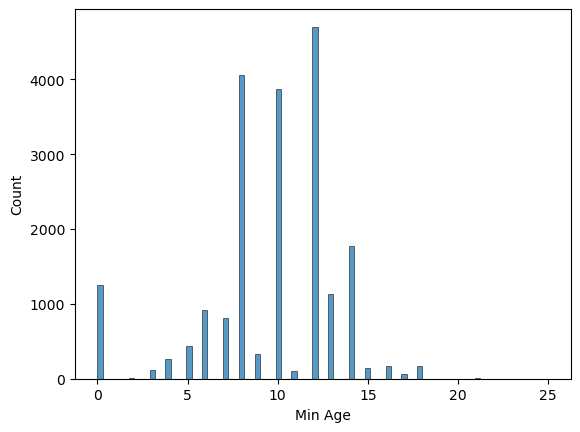

In [25]:
sns.histplot(board_game_data, x='Min Age')

C:\Users\ejb51\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating Average', ylabel='Count'>

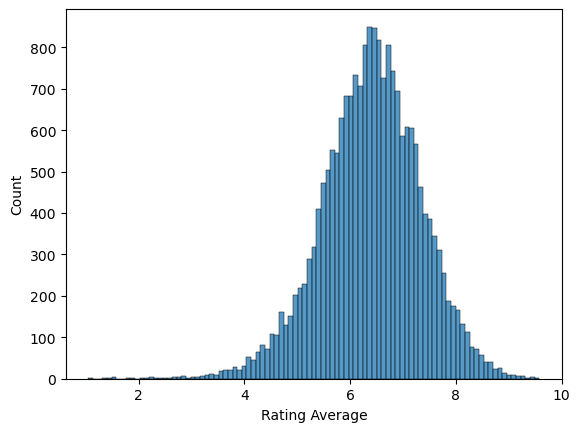

In [27]:
sns.histplot(board_game_data, x='Rating Average')

C:\Users\ejb51\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year Published', ylabel='Count'>

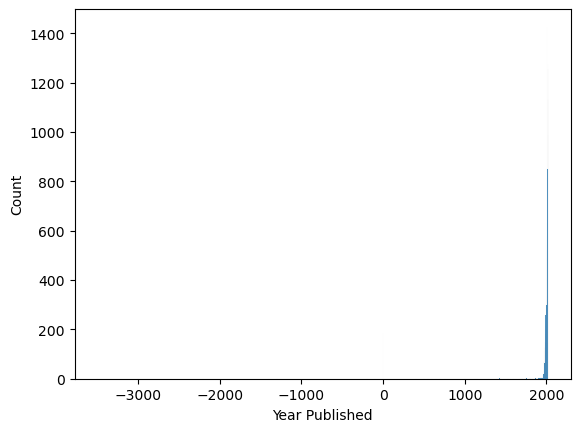

In [28]:
sns.histplot(board_game_data, x='Year Published')

C:\Users\ejb51\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Play Time', ylabel='Count'>

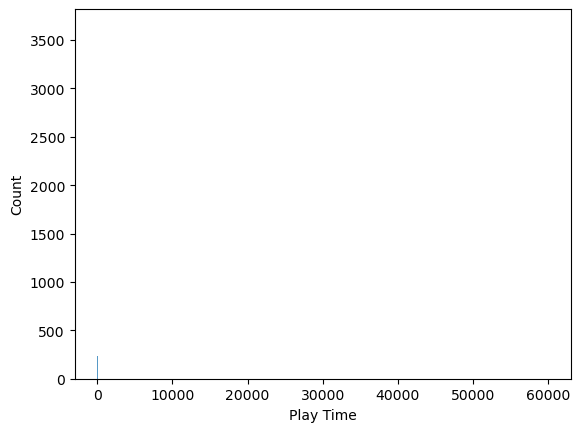

In [26]:
sns.histplot(board_game_data, x='Play Time')

C:\Users\ejb51\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Min Players', ylabel='Count'>

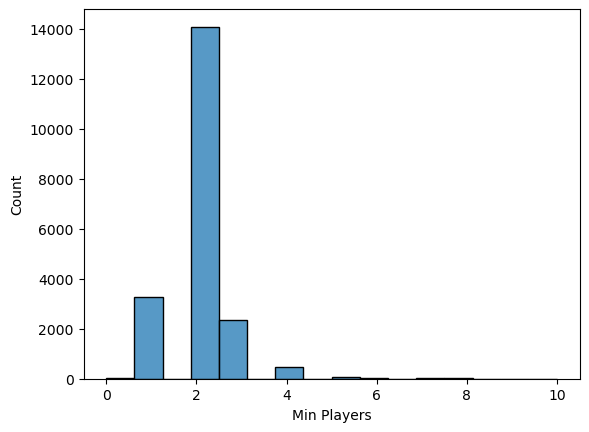

In [32]:
sns.histplot(board_game_data, x='Min Players')

C:\Users\ejb51\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Max Players', ylabel='Count'>

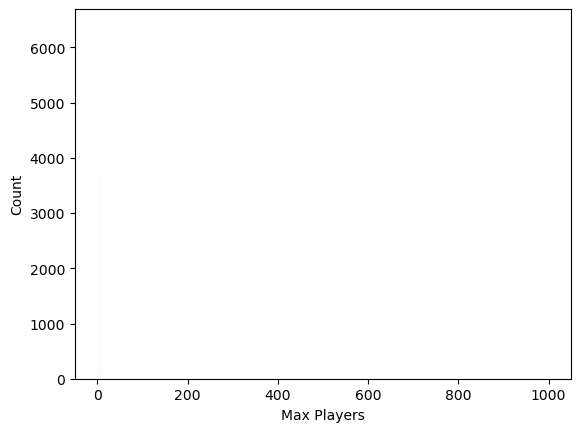

In [33]:
sns.histplot(board_game_data, x='Max Players')

In [12]:
board_game_data['Domains'].value_counts()

Domains
Wargames                                          3029
Strategy Games                                    1455
Family Games                                      1340
Abstract Games                                     869
Children's Games                                   708
Thematic Games                                     647
Party Games                                        409
Family Games, Strategy Games                       354
Customizable Games                                 235
Strategy Games, Thematic Games                     217
Thematic Games, Wargames                           139
Family Games, Party Games                          139
Abstract Games, Family Games                       116
Family Games, Thematic Games                       109
Children's Games, Family Games                     105
Strategy Games, Wargames                            99
Abstract Games, Strategy Games                      40
Party Games, Thematic Games                         36
Cu

In [13]:
board_game_data['Mechanics'].value_counts()

Mechanics
Hand Management                                                                                                 432
Hexagon Grid                                                                                                    412
Dice Rolling                                                                                                    372
Roll / Spin and Move                                                                                            369
Tile Placement                                                                                                  285
                                                                                                               ... 
Dice Rolling, Measurement Movement, Pick-up and Deliver, Variable Player Powers, Variable Set-up                  1
Action Points, Dice Rolling, Grid Movement, Modular Board, Variable Phase Order, Variable Player Powers           1
Area Movement, Hidden Movement, Secret Unit Deployment, Team-B

<Axes: xlabel='Rating Average', ylabel='Complexity Average'>

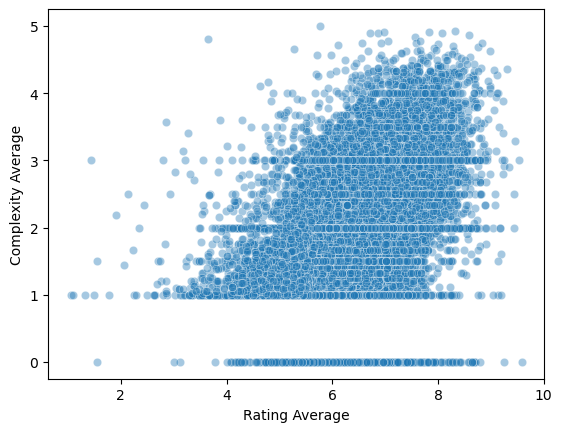

In [40]:
sns.scatterplot(board_game_data, x='Rating Average', y='Complexity Average', alpha=0.4)

## **4. Data Preprocessing** <a class="anchor" id="data-preprocess"></a>

## **5. Model Selection and Training** <a class="anchor" id="selection"></a>

### 5.1 Shortlist Promising Models <a class="anchor" id="initial"></a>

### 5.2 Fine Tuning<a class="anchor" id="fine"></a>

## **6. Model Evaluation** <a class="anchor" id="evaluation"></a>

## **7. Conclusion** <a class="anchor" id="conclude"></a>

## **8. Appendix** <a class="anchor" id="append"></a>

The description of the columns from the dataset author's Kaggle post are listed below:

|variable                 |class     |description |
|:---|:---|:-------|
|ID                       |int       | BoardGameGeek ID Number |
|Name                     |character | Board game name  |
|Year Published           |int       | Year published  |
|Min Players              |int       | The minimum suggested number of players to play the game |
|Max Players              |int       | The maximum suggested number of players to play the game |
|Play Time                |int       | Average play time in minutes as suggested by the game creators |
|Min Age                  |int       | Age rating |
|Users Rated              |int       | Number of users who rated the game |
|Rating Average           |float64   | Average of user ratings |
|BGG Rank                 |int       | BoardGameGeek ranking |
|Complexity Average       |float64   | Average of user ratings for complexity from 1 - 5 |
|Owned Users              |int       | Number of users who own the game |
|Mechanics                |character | List of game mechanics for that game |
|Domains                  |character | List of game subgenres |